# Proyecto IMT2200 Grupo11
## Integrantes:
- Benjamin Vasquez

## Datos Bases Para todas las preguntas

In [1]:
#Librerias a usar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

In [2]:
df_censo = pd.read_csv('../database/Cantidad-de-Personas-por-Sexo-y-Edad.csv', sep=";")
df_farmacias = pd.read_csv("../database/2.-Farmacias-Chile-07.2023.csv", sep=";", encoding="utf-8")
df_hospitales = pd.read_excel("../database/Establecimientos_ChileDEIS_MINSAL 03-11-2023.xlsx", sheet_name="Establecimientos Vigentes")

In [3]:
def modificar_nombre_columna(nombre: str):
    nombre = nombre.strip()  
    nombre = nombre.lower() 
    nombre = nombre.replace(" ", "_")
    nombre = nombre.replace("\xa0", "_")
    return nombre

nuevos_nombres = {columna: modificar_nombre_columna(columna) for columna in df_censo.columns}
df_censo.rename(columns=nuevos_nombres, inplace=True)
df_censo.columns

df_censo["código_región"] = pd.to_numeric(df_censo["código_región"], errors="coerce")
df_censo["código_provincia"] = pd.to_numeric(df_censo["código_provincia"], errors="coerce")
df_censo["código_comuna"] = pd.to_numeric(df_censo["código_comuna"], errors="coerce")
df_censo["edad"] = df_censo["edad"].astype("category")
df_censo["hombres"] = df_censo["hombres"].str.replace(".", "").astype("int")
df_censo["mujeres"] = df_censo["mujeres"].str.replace(".", "").astype("int")
df_censo["total"] = df_censo["total"].str.replace(".", "").astype("int")

C:\Users\56961\AppData\Local\Temp\ipykernel_28432\3676604115.py:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_censo["hombres"] = df_censo["hombres"].str.replace(".", "").astype("int")
C:\Users\56961\AppData\Local\Temp\ipykernel_28432\3676604115.py:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_censo["mujeres"] = df_censo["mujeres"].str.replace(".", "").astype("int")
C:\Users\56961\AppData\Local\Temp\ipykernel_28432\3676604115.py:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_censo["total"] = df_censo["

In [4]:
df_hospitales.columns = df_hospitales.loc[0,:]
df_hospitales.drop(0, inplace=True)
df_hospitales.drop(columns=["Código Antiguo ", "Código  Madre Antiguo", "Código Madre Nuevo", "Código  Madre Antiguo", "Fecha de Incorporación a la base o cambios", "Teléfono", "Fecha Inicio Funcionamiento", "Vía", "Certificación ", "Número", "Dirección", "Clasificcion Tipo de SAPU", "Tipo Establecimiento (Unidad)", "Dependencia Administrativa"], inplace=True)

In [5]:
df_hospitales.replace(["No Aplica", "Pendiente", "Completar", "No Aplica", "Por confirmar", "no Aplica", "Pendiente", "no aplica", "No Aplica"], np.NaN, inplace=True)

df_hospitales["Código Vigente"] = df_hospitales["Código Vigente"].astype("int")

df_hospitales["Código Región"] = df_hospitales["Código Región"].astype("int")

df_hospitales["Código Dependencia Jerárquica (SEREMI / Servicio de Salud)"] = df_hospitales["Código Dependencia Jerárquica (SEREMI / Servicio de Salud)"].astype("float")

df_hospitales["Pertenencia al SNSS"] = df_hospitales["Pertenencia al SNSS"].map(lambda x: x == 'Perteneciente' or x == True)
df_hospitales["Pertenencia al SNSS"] = df_hospitales["Pertenencia al SNSS"].astype("bool")

df_hospitales["Nivel de Atención"] = df_hospitales["Nivel de Atención"].astype("category")

df_hospitales["Tiene Servicio de Urgencia"] = df_hospitales["Tiene Servicio de Urgencia"].map(lambda x: x == 'SI' or x == True)
df_hospitales["Tiene Servicio de Urgencia"] = df_hospitales["Tiene Servicio de Urgencia"].astype("bool")
df_hospitales["Tipo de Urgencia "] = df_hospitales["Tipo de Urgencia "].astype("category")
df_hospitales["Tipo de Prestador Sistema de Salud"] = df_hospitales["Tipo de Prestador Sistema de Salud"].astype("category")

df_hospitales["Nivel de Complejidad"] = df_hospitales["Nivel de Complejidad"].astype("category")
df_hospitales["Tipo de Atención "] = df_hospitales["Tipo de Atención "].astype("category")

In [6]:
df_hospitales = df_hospitales[df_hospitales['Estado de Funcionamiento'].str.contains("Vigente", case=False, na=False)]
df_hospitales.drop(columns="Estado de Funcionamiento", inplace=True)

In [7]:

nuevos_nombres = {columna: modificar_nombre_columna(columna) for columna in df_hospitales.columns}
df_hospitales.rename(columns=nuevos_nombres, inplace=True)
df_hospitales.rename(columns={"latitud______[grados_decimales]": "latitud", "longitud_[grados_decimales]":"longitud"}, inplace=True)
df_hospitales["código_región"] = df_hospitales["código_región"].astype("int")
df_hospitales["código_comuna"] = df_hospitales["código_comuna"].astype("int")
df_hospitales["nombre_comuna"] = df_hospitales["nombre_comuna"].str.upper()
df_hospitales.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4525 entries, 1 to 4526
Data columns (total 18 columns):
 #   Column                                                      Non-Null Count  Dtype   
---  ------                                                      --------------  -----   
 0   código_vigente                                              4525 non-null   int32   
 1   código_región                                               4525 non-null   int32   
 2   nombre_región                                               4525 non-null   object  
 3   código_dependencia_jerárquica_(seremi_/_servicio_de_salud)  4482 non-null   float64 
 4   nombre_dependencia_jerárquica_(seremi_/_servicio_de_salud)  4483 non-null   object  
 5   pertenencia_al_snss                                         4525 non-null   bool    
 6   ámbito_de_funcionamiento                                    4525 non-null   object  
 7   nombre_oficial                                              4525 non-null   ob

In [8]:
comunas_ñuble = {16109: 'YUNGAY',
 16105: 'PEMUCO',
 16104: 'EL CARMEN',
 16107: 'QUILLÓN',
 16108: 'SAN IGNACIO',
 16106: 'PINTO',
 16102: 'BULNES',
 16302: 'COIHUECO',
 16103: 'CHILLÁN VIEJO',
 16206: 'RÁNQUIL',
 16304: 'SAN FABIÁN',
 16101: 'CHILLÁN',
 16205: 'PORTEZUELO',
 16203: 'COELEMU',
 16305: 'SAN NICOLÁS',
 16301: 'SAN CARLOS',
 16207: 'TREGUACO',
 16204: 'NINHUE',
 16303: 'ÑIQUÉN',
 16201: 'QUIRIHUE',
 16202: 'COBQUECURA'}
comunas_ñuble = {v: k for k, v in comunas_ñuble.items()}


provincias_ñuble = {
    161: "DIGUILLÍN",
    162: "ITATA",
    163: "PUNILLA"
}


In [9]:
d = df_censo[df_censo["nombre_provincia"].str.contains("ÑUBLE")]
d["nombre_comuna"] = d["nombre_comuna"].str.replace(" *", "")
d
d["código_comuna"] = d["nombre_comuna"].map(comunas_ñuble).astype("string")
d["nombre_región"] = "ÑUBLE"
d["código_región"] = 16
d["código_provincia"] = d["código_comuna"].str.slice(0,3)
d["código_provincia"] = d["código_provincia"].astype("int")
d["nombre_provincia"] = d["código_provincia"].map(provincias_ñuble)





C:\Users\56961\AppData\Local\Temp\ipykernel_23620\4203659101.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  d["nombre_comuna"] = d["nombre_comuna"].str.replace(" *", "")
C:\Users\56961\AppData\Local\Temp\ipykernel_23620\4203659101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d["nombre_comuna"] = d["nombre_comuna"].str.replace(" *", "")
C:\Users\56961\AppData\Local\Temp\ipykernel_23620\4203659101.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NAType'

In [ ]:
df_censo.drop(df_censo[df_censo["nombre_provincia"].str.contains("ÑUBLE")].index, inplace=True)


In [ ]:
df_censo = pd.concat([df_censo, d], ignore_index=True)
df_censo


In [ ]:
df_censo.sort_values(by="orden", inplace=True)

In [ ]:
codigo_comuna_a_provincia = dict(zip(df_censo['código_comuna'], df_censo['código_provincia']))
codigo_comuna_a_provincia = {int(comuna): int(provincia) for comuna, provincia in codigo_comuna_a_provincia.items() if not pd.isna(provincia)}

codigo_comuna_a_region = dict(zip(df_censo['código_comuna'], df_censo['código_región']))
codigo_comuna_a_region = {int(comuna): int(region) for comuna, region in codigo_comuna_a_region.items() if not pd.isna(region)}


In [ ]:
df_hospitales.loc[:, "código_provincia"] = df_hospitales["código_comuna"].map(codigo_comuna_a_provincia)
df_hospitales["código_provincia"] = df_hospitales["código_provincia"].astype("int")

In [ ]:
nuevos_nombres = {columna: modificar_nombre_columna(columna) for columna in df_farmacias.columns}
df_farmacias.rename(columns=nuevos_nombres, inplace=True)


In [ ]:
df_farmacias.drop(columns=["empresa_farmacéutica", "empresa_rut", "empresa_razón_social", "nro_resolución_apertura", "número", "dirección", "fecha_res."], inplace=True)

In [ ]:
df_farmacias.replace(["SIN RECETARIO", "NOSELECCIONADO"], np.nan)

df_farmacias["tipo"] = df_farmacias["tipo"].astype("category")

df_farmacias["latitud"] = df_farmacias["latitud"].str.replace(",",".").str.rstrip(".").str.rstrip("°")

df_farmacias["longitud"] = df_farmacias["longitud"].str.replace(",",".").str.rstrip(".").str.rstrip("°")

df_farmacias["tipo_recetario"] = df_farmacias["tipo_recetario"].astype("category")

df_farmacias["alopática"] = df_farmacias["alopática"].map(lambda x: x == 'SI' or x == True)
df_farmacias["alopática"] = df_farmacias["alopática"].astype("bool")

df_farmacias["homeopática"] = df_farmacias["homeopática"].map(lambda x: x == 'SI' or x == True)
df_farmacias["homeopática"] = df_farmacias["homeopática"].astype("bool")


In [ ]:
nombre_comuna_a_codigo_comuna = {'ARICA': 15101, 'CAMARONES': 15102, 'PUTRE': 15201, 'GENERAL LAGOS': 15202, 'IQUIQUE': 1101, 'ALTO HOSPICIO': 1107, 'POZO ALMONTE': 1401, 'CAMIÑA': 1402, 'CAMINA': 1402, 'COLCHANE': 1403, 'HUARA': 1404, 'PICA': 1405, 'ANTOFAGASTA': 2101, 'MEJILLONES': 2102, 'SIERRA GORDA': 2103, 'TALTAL': 2104, 'CALAMA': 2201, 'OLLAGÜE': 2202, 'OLLAGUE': 2202, 'SAN PEDRO DE ATACAMA': 2203, 'TOCOPILLA': 2301, 'MARÍA ELENA': 2302, 'MARIA ELENA': 2302, 'COPIAPÓ': 3101, 'COPIAPO': 3101, 'CALDERA': 3102, 'TIERRA AMARILLA': 3103, 'CHAÑARAL': 3201, 'CHANARAL': 3201, 'DIEGO DE ALMAGRO': 3202, 'VALLENAR': 3301, 'ALTO DEL CARMEN': 3302, 'FREIRINA': 3303, 'HUASCO': 3304, 'LA SERENA': 4101, 'COQUIMBO': 4102, 'ANDACOLLO': 4103, 'LA HIGUERA': 4104, 'PAIGUANO': 4105, 'VICUÑA': 4106, 'VICUNA': 4106, 'ILLAPEL': 4201, 'CANELA': 4202, 'LOS VILOS': 4203, 'SALAMANCA': 4204, 'OVALLE': 4301, 'COMBARBALÁ': 4302, 'COMBARBALA': 4302, 'MONTE PATRIA': 4303, 'PUNITAQUI': 4304, 'RÍO HURTADO': 4305, 'RIO HURTADO': 4305, 'VALPARAÍSO': 5101, 'VALPARAISO': 5101, 'CASABLANCA': 5102, 'CONCÓN': 5103, 'CONCON': 5103, 'JUAN FERNÁNDEZ': 5104, 'JUAN FERNANDEZ': 5104, 'PUCHUNCAVÍ': 5105, 'PUCHUNCAVI': 5105, 'QUINTERO': 5107, 'VIÑA DEL MAR': 5109, 'VINA DEL MAR': 5109, 'ISLA DE PASCUA': 5201, 'LOS ANDES': 5301, 'CALLE LARGA': 5302, 'RINCONADA': 5303, 'SAN ESTEBAN': 5304, 'LA LIGUA': 5401, 'CABILDO': 5402, 'PAPUDO': 5403, 'PETORCA': 5404, 'ZAPALLAR': 5405, 'QUILLOTA': 5501, 'CALERA': 5502, 'LA CALERA': 5502, 'HIJUELAS': 5503, 'LA CRUZ': 5504, 'NOGALES': 5506, 'SAN ANTONIO': 5601, 'ALGARROBO': 5602, 'CARTAGENA': 5603, 'EL QUISCO': 5604, 'EL TABO': 5605, 'SANTO DOMINGO': 5606, 'SAN FELIPE': 5701, 'CATEMU': 5702, 'LLAILLAY': 5703, 'PANQUEHUE': 5704, 'PUTAENDO': 5705, 'SANTA MARÍA': 5706, 'SANTA MARIA': 5706, 'QUILPUÉ': 5801, 'QUILPUE': 5801, 'LIMACHE': 5802, 'OLMUÉ': 5803, 'OLMUE': 5803, 'VILLA ALEMANA': 5804, 'SANTIAGO': 13101, 'CERRILLOS': 13102, 'CERRO NAVIA': 13103, 'CONCHALÍ': 13104, 'CONCHALI': 13104, 'EL BOSQUE': 13105, 'ESTACIÓN CENTRAL': 13106, 'ESTACION CENTRAL': 13106, 'HUECHURABA': 13107, 'INDEPENDENCIA': 13108, 'LA CISTERNA': 13109, 'LA FLORIDA': 13110, 'LA GRANJA': 13111, 'LA PINTANA': 13112, 'LA REINA': 13113, 'LAS CONDES': 13114, 'LO BARNECHEA': 13115, 'LO ESPEJO': 13116, 'LO PRADO': 13117, 'MACUL': 13118, 'MAIPÚ': 13119, 'MAIPU': 13119, 'ÑUÑOA': 13120, 'NUNOA': 13120, 'PEDRO AGUIRRE CERDA': 13121, 'PEÑALOLÉN': 13122, 'PENALOLEN': 13122, 'PROVIDENCIA': 13123, 'PUDAHUEL': 13124, 'QUILICURA': 13125, 'QUINTA NORMAL': 13126, 'RECOLETA': 13127, 'RENCA': 13128, 'SAN JOAQUÍN': 13129, 'SAN JOAQUIN': 13129, 'SAN MIGUEL': 13130, 'SAN RAMÓN': 13131, 'SAN RAMON': 13131, 'VITACURA': 13132, 'PUENTE ALTO': 13201, 'PIRQUE': 13202, 'SAN JOSÉ DE MAIPO': 13203, 'SAN JOSE DE MAIPO': 13203, 'COLINA': 13301, 'LAMPA': 13302, 'TILTIL': 13303, 'TIL-TIL': 13303, 'SAN BERNARDO': 13401, 'BUIN': 13402, 'CALERA DE TANGO': 13403, 'PAINE': 13404, 'MELIPILLA': 13501, 'ALHUÉ': 13502, 'ALHUE': 13502, 'CURACAVÍ': 13503, 'CURACAVI': 13503, 'MARÍA PINTO': 13504, 'MARIA PINTO': 13504, 'SAN PEDRO': 13505, 'TALAGANTE': 13601, 'EL MONTE': 13602, 'ISLA DE MAIPO': 13603, 'PADRE HURTADO': 13604, 'PEÑAFLOR': 13605, 'PENAFLOR': 13605, 'RANCAGUA': 6101, 'CODEGUA': 6102, 'COINCO': 6103, 'COLTAUCO': 6104, 'DOÑIHUE': 6105, 'DONIHUE': 6105, 'GRANEROS': 6106, 'LAS CABRAS': 6107, 'MACHALÍ': 6108, 'MACHALI': 6108, 'MALLOA': 6109, 'MOSTAZAL': 6110, 'OLIVAR': 6111, 'PEUMO': 6112, 'PICHIDEGUA': 6113, 'QUINTA DE TILCOCO': 6114, 'RENGO': 6115, 'REQUÍNOA': 6116, 'REQUINOA': 6116, 'SAN VICENTE': 6117, 'PICHILEMU': 6201, 'LA ESTRELLA': 6202, 'LITUECHE': 6203, 'MARCHIHUE': 6204, 'NAVIDAD': 6205, 'PAREDONES': 6206, 'SAN FERNANDO': 6301, 'CHÉPICA': 6302, 'CHEPICA': 6302, 'CHIMBARONGO': 6303, 'LOLOL': 6304, 'NANCAGUA': 6305, 'PALMILLA': 6306, 'PERALILLO': 6307, 'PLACILLA': 6308, 'PUMANQUE': 6309, 'SANTA CRUZ': 6310, 'TALCA': 7101, 'CONSTITUCIÓN': 7102, 'CONSTITUCION': 7102, 'CUREPTO': 7103, 'EMPEDRADO': 7104, 'MAULE': 7105, 'PELARCO': 7106, 'PENCAHUE': 7107, 'RÍO CLARO': 7108, 'RIO CLARO': 7108, 'SAN CLEMENTE': 7109, 'SAN RAFAEL': 7110, 'CAUQUENES': 7201, 'CHANCO': 7202, 'PELLUHUE': 7203, 'CURICÓ': 7301, 'CURICO': 7301, 'HUALAÑÉ': 7302, 'HUALANE': 7302, 'LICANTÉN': 7303, 'LICANTEN': 7303, 'MOLINA': 7304, 'RAUCO': 7305, 'ROMERAL': 7306, 'SAGRADA FAMILIA': 7307, 'TENO': 7308, 'VICHUQUÉN': 7309, 'VICHUQUEN': 7309, 'LINARES': 7401, 'COLBÚN': 7402, 'COLBUN': 7402, 'LONGAVÍ': 7403, 'LONGAVI': 7403, 'PARRAL': 7404, 'RETIRO': 7405, 'SAN JAVIER': 7406, 'VILLA ALEGRE': 7407, 'YERBAS BUENAS': 7408, 'CONCEPCIÓN': 8101, 'CONCEPCION': 8101, 'CORONEL': 8102, 'CHIGUAYANTE': 8103, 'FLORIDA': 8104, 'HUALQUI': 8105, 'LOTA': 8106, 'PENCO': 8107, 'SAN PEDRO DE LA PAZ': 8108, 'SANTA JUANA': 8109, 'TALCAHUANO': 8110, 'TOMÉ': 8111, 'TOME': 8111, 'HUALPÉN': 8112, 'HUALPEN': 8112, 'LEBU': 8201, 'ARAUCO': 8202, 'CAÑETE': 8203, 'CANETE': 8203, 'CONTULMO': 8204, 'CURANILAHUE': 8205, 'LOS ÁLAMOS': 8206, 'LOS ALAMOS': 8206, 'TIRÚA': 8207, 'TIRUA': 8207, 'LOS ÁNGELES': 8301, 'LOS ANGELES': 8301, 'ANTUCO': 8302, 'CABRERO': 8303, 'LAJA': 8304, 'MULCHÉN': 8305, 'MULCHEN': 8305, 'NACIMIENTO': 8306, 'NEGRETE': 8307, 'QUILACO': 8308, 'QUILLECO': 8309, 'SAN ROSENDO': 8310, 'SANTA BÁRBARA': 8311, 'SANTA BARBARA': 8311, 'TUCAPEL': 8312, 'YUMBEL': 8313, 'ALTO BIOBÍO': 8314, 'ALTO BIOBIO': 8314, 'CHILLÁN': 16101, 'CHILLAN': 16101, 'BULNES': 16102, 'COBQUECURA': 16202, 'COELEMU': 16203, 'COIHUECO': 16302, 'CHILLÁN VIEJO': 16103, 'CHILLAN VIEJO': 16103, 'EL CARMEN': 16104, 'NINHUE': 16204, 'ÑIQUÉN': 16303, 'NIQUEN': 16303, 'PEMUCO': 16105, 'PINTO': 16106, 'PORTEZUELO': 16205, 'QUILLÓN': 16107, 'QUILLON': 16107, 'QUIRIHUE': 16201, 'RÁNQUIL': 16206, 'RANQUIL': 16206, 'SAN CARLOS': 16301, 'SAN FABIÁN': 16304, 'SAN FABIAN': 16304, 'SAN IGNACIO': 16108, 'SAN NICOLÁS': 16305, 'SAN NICOLAS': 16305, 'TREGUACO': 16207, 'YUNGAY': 16109, 'TEMUCO': 9101, 'CARAHUE': 9102, 'CUNCO': 9103, 'CURARREHUE': 9104, 'FREIRE': 9105, 'GALVARINO': 9106, 'GORBEA': 9107, 'LAUTARO': 9108, 'LONCOCHE': 9109, 'MELIPEUCO': 9110, 'NUEVA IMPERIAL': 9111, 'PADRE LAS CASAS': 9112, 'PERQUENCO': 9113, 'PITRUFQUÉN': 9114, 'PITRUFQUEN': 9114, 'PUCÓN': 9115, 'PUCON': 9115, 'SAAVEDRA': 9116, 'TEODORO SCHMIDT': 9117, 'TOLTÉN': 9118, 'TOLTEN': 9118, 'VILCÚN': 9119, 'VILCUN': 9119, 'VILLARRICA': 9120, 'CHOLCHOL': 9121, 'ANGOL': 9201, 'COLLIPULLI': 9202, 'CURACAUTÍN': 9203, 'CURACAUTIN': 9203, 'ERCILLA': 9204, 'LONQUIMAY': 9205, 'LOS SAUCES': 9206, 'LUMACO': 9207, 'PURÉN': 9208, 'PUREN': 9208, 'RENAICO': 9209, 'TRAIGUÉN': 9210, 'TRAIGUEN': 9210, 'VICTORIA': 9211, 'VALDIVIA': 14101, 'CORRAL': 14102, 'LANCO': 14103, 'LOS LAGOS': 14104, 'MÁFIL': 14105, 'MAFIL': 14105, 'MARIQUINA': 14106, 'PAILLACO': 14107, 'PANGUIPULLI': 14108, 'LA UNIÓN': 14201, 'LA UNION': 14201, 'FUTRONO': 14202, 'LAGO RANCO': 14203, 'RÍO BUENO': 14204, 'RIO BUENO': 14204, 'PUERTO MONTT': 10101, 'CALBUCO': 10102, 'COCHAMÓ': 10103, 'COCHAMO': 10103, 'FRESIA': 10104, 'FRUTILLAR': 10105, 'LOS MUERMOS': 10106, 'LLANQUIHUE': 10107, 'MAULLÍN': 10108, 'MAULLIN': 10108, 'PUERTO VARAS': 10109, 'CASTRO': 10201, 'ANCUD': 10202, 'CHONCHI': 10203, 'CURACO DE VÉLEZ': 10204, 'CURACO DE VELEZ': 10204, 'DALCAHUE': 10205, 'PUQUELDÓN': 10206, 'PUQUELDON': 10206, 'QUEILÉN': 10207, 'QUEILEN': 10207, 'QUELLÓN': 10208, 'QUELLON': 10208, 'QUEMCHI': 10209, 'QUINCHAO': 10210, 'OSORNO': 10301, 'PUERTO OCTAY': 10302, 'PURRANQUE': 10303, 'PUYEHUE': 10304, 'RÍO NEGRO': 10305, 'RIO NEGRO': 10305, 'SAN JUAN DE LA COSTA': 10306, 'SAN PABLO': 10307, 'CHAITÉN': 10401, 'CHAITEN': 10401, 'FUTALEUFÚ': 10402, 'FUTALEUFU': 10402, 'HUALAIHUÉ': 10403, 'HUALAIHUE': 10403, 'PALENA': 10404, 'COYHAIQUE': 11101, 'LAGO VERDE': 11102, 'AYSÉN': 11201, 'AYSEN': 11201, 'CISNES': 11202, 'GUAITECAS': 11203, 'COCHRANE': 11301, "O'HIGGINS": 11302, 'TORTEL': 11303, 'CHILE CHICO': 11401, 'RÍO IBÁÑEZ': 11402, 'RIO IBANEZ': 11402, 'PUNTA ARENAS': 12101, 'LAGUNA BLANCA': 12102, 'RÍO VERDE': 12103, 'RIO VERDE': 12103, 'SAN GREGORIO': 12104, 'CABO DE HORNOS': 12201, 'ANTÁRTICA': 12202, 'ANTARTICA': 12202, 'PORVENIR': 12301, 'PRIMAVERA': 12302, 'TIMAUKEL': 12303, 'NATALES': 12401, 'TORRES DEL PAINE': 12402, 'SAN FRANCISCO DE MOSTAZAL': 6110, 'ALTO BIO BIO': 8314, 'PUERTO NATALES': 12401, 'LLAY LLAY': 5703, 'MARCHIGUE': 6204, 'CHOL CHOL': 9121, 'PAIHUANO': 4105}

In [ ]:
df_farmacias.loc[:,"código_comuna"] = df_farmacias.loc[:,"comuna"].str.replace("Ñ", "N").map(nombre_comuna_a_codigo_comuna)
df_farmacias.loc[:,"código_provincia"] = df_farmacias.loc[:,"código_comuna"].map(codigo_comuna_a_provincia)
df_farmacias.loc[:,"código_región"] = df_farmacias.loc[:,"código_comuna"].map(codigo_comuna_a_region)

df_farmacias.dropna(subset="comuna", inplace=True)
df_farmacias["código_comuna"] = df_farmacias["código_comuna"].astype("int")

In [ ]:
df_farmacias["latitud"] = pd.to_numeric(df_farmacias['latitud'], errors='coerce')
df_farmacias["longitud"] = pd.to_numeric(df_farmacias['longitud'], errors='coerce')

In [ ]:
df_farmacias.info()

In [ ]:
df_hospitales

In [ ]:
df_farmacias

# Pregunta 4
### ¿Cuál es la distancia promedio entre los centros de salud y zonas pobladas?


In [146]:
#abrimos el shapefile de areas pobladas obtemido de "https://www.bcn.cl/obtienearchivo?id=repositorio/10221/10405/2/Areas_Pobladas.zip"
areas_pobladas = gpd.read_file('../database/DatosGeograficos/Areas_Pobladas.shp', engine="fiona", crs='')
areas_pobladas['geometry'] = areas_pobladas['geometry'].to_crs(5360)

Este archivo de areas pobladas proviene de la biblioteca del congreso nacional de chile y contiene la figura de cada una de las areas que se consideran pobladas
en el territorio chileno, esto no contien lo que el INE clasifica como caserios, la division mas pequeña que se maneja en este archivo es "aldea". Justamente estas 'aldeas' que estan en el archivo
son los lugares donde nos queremos concentrar para lograr encontrar que tan lejos estan de centros de salud de baja, media y alta complejidad.

A continuacion se detalla el limpiamiento de los datos y una breve exploración ya que al trabajar con datos geoespaciales medidas de exploración como promedio y desviación estandar nos son de poca utilidad.
Asumiremos el centroide de cada localidad como el punto de referencia para medir distancia hacia los establecimientos de salud, mas adelante iremos descartando localidades que tengan centros de salud dentro de ellas segun necesitemos en cada caso.

In [147]:
#calculamos el centroide de cada figura
areas_pobladas["centroide"] = areas_pobladas["geometry"].centroid

C:\Users\56961\AppData\Local\Temp\ipykernel_28432\1046282378.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas_pobladas["centroide"] = areas_pobladas["geometry"].centroid


In [148]:
#separamos la latitud y longitud en dos coluumnas para poder hacer masfacilmente la resta entre
#los hospitales y las areas pobladas ya que el dataframe de los hospitales contiene la ubicacion en dos columnas separadas

areas_pobladas['lat'] = areas_pobladas.centroide.y
areas_pobladas['long'] = areas_pobladas.centroide.x

Ahora que tenemos lo datos necesarios para contestar la pregunta 4 creados, procederos a limpiar la base de datos de hospitales.
Primero eliminaremos las filas que no tengan datos en latitud o longitud ya que sin las coordenadas no se podra responder la pregunta.

In [149]:
df_hospitales_P4 = df_hospitales.dropna(subset=['latitud', 'longitud', 'nivel_de_complejidad'])

In [150]:
#pasamos el dataframe de hospitales a un geodaframe para poder hacer uso de los metodos que se incluyen en geopandas
gdf_hospitales = gpd.GeoDataFrame(
    df_hospitales_P4, geometry=gpd.points_from_xy(df_hospitales_P4.longitud, df_hospitales_P4.latitud), crs="EPSG:5360"
)

In [151]:
#creamos un diccionario que cotiene los hospitales de cada región, y estos ademas separados por complejidad.
centros_de_salud_por_region = {}
for region in gdf_hospitales.código_región.unique():
    centros_de_salud_por_complejidad = {}
    for complejidad in gdf_hospitales[gdf_hospitales['código_región'] == region].nivel_de_complejidad.unique():
        mask = ((gdf_hospitales['código_región'] == region) & (gdf_hospitales['nivel_de_complejidad'] == complejidad))
        centros_de_salud_por_complejidad[complejidad] = gdf_hospitales[mask]
    centros_de_salud_por_region[region] = centros_de_salud_por_complejidad

In [152]:
comunas = gpd.read_file('../database/DatosGeograficos/comunas.shp', engine="fiona", crs='')
comunas.rename(columns={'codregion': 'código_región', 'Region': 'nombre_región', 'Comuna': 'comuna'}, inplace=True)
comunas['geometry'] = comunas['geometry'].to_crs(5360)

In [153]:
comunas

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,código_región,st_area_sh,st_length_,nombre_región,comuna,Provincia,geometry
0,48,170038.624165,16,8,6204,6,9.685774e+08,206184.271675,Región del Libertador Bernardo O'Higgins,Marchigüe,Cardenal Caro,"POLYGON ((-71.80071 -34.20728, -71.79992 -34.2..."
1,29,125730.104795,15,8,6102,6,4.157446e+08,151911.576827,Región del Libertador Bernardo O'Higgins,Codegua,Cachapoal,"POLYGON ((-70.35293 -33.95263, -70.35243 -33.9..."
2,30,63026.084422,15,8,6103,6,1.448565e+08,76355.326122,Región del Libertador Bernardo O'Higgins,Coinco,Cachapoal,"POLYGON ((-70.90058 -34.23703, -70.90063 -34.2..."
3,31,89840.903562,15,8,6104,6,3.256572e+08,108874.623150,Región del Libertador Bernardo O'Higgins,Coltauco,Cachapoal,"POLYGON ((-71.02492 -34.17053, -71.02320 -34.1..."
4,78,122626.493264,23,11,9121,9,6.990727e+08,156680.410681,Región de La Araucanía,Cholchol,Cautín,"POLYGON ((-72.95898 -38.46877, -72.95797 -38.4..."
...,...,...,...,...,...,...,...,...,...,...,...,...
341,255,130240.555805,19,10,16305,16,8.751006e+08,160459.137929,Región de Ñuble,San Nicolás,Punilla,"POLYGON ((-72.24207 -36.35227, -72.24014 -36.3..."
342,253,311061.932415,19,10,16304,16,2.393007e+09,388109.613857,Región de Ñuble,San Fabián,Punilla,"POLYGON ((-71.24834 -36.45596, -71.24827 -36.4..."
343,245,159257.906431,19,10,16303,16,7.638173e+08,195593.933727,Región de Ñuble,Ñiquén,Punilla,"POLYGON ((-72.09907 -36.13712, -72.09819 -36.1..."
344,243,157467.049667,19,10,16104,16,1.044405e+09,196962.664313,Región de Ñuble,El Carmen,Ñuble,"POLYGON ((-71.74229 -36.82882, -71.74224 -36.8..."


In [154]:
areas_pobladas_expandido = pd.merge(areas_pobladas, comunas, how='outer', on='comuna')

In [155]:
#comunas del archivo de areas pobladas que no fueron asignadas a comunas de comunas. AKA 'comunas sin región'
for name in areas_pobladas_expandido[areas_pobladas_expandido['nombre_región'].isna()]['comuna'].unique():
    print(name)

Tirua
Quillaco
Requinoa
Mulchen
San Nicolas
Santa Barbara
Dichato
Chillan Viejo
Chillan
Mellipeuco
Traiguen
Puren
Teodoro Schimidt
Tolten
Padre de Las Casas
Curacautin
Quellon
Tiltíl
Chaiten
Mafil
PUCHUNCAVI
Los Ángeles
Quilpue
Olmue
La Calera
Cabo de HOrnos
Machali
Maríe Elena
Longavi
Licanten
Río Ibañez
Curacavi
PUENTE ALTO
Ranquíl
Las Cruces
O´Higgins
Maullin
Futaleufu
Curaco
Ranco
Rio Bueno
San Juan de La Costa
Coihaique


In [156]:
#nombres correctos para que merge funcione con todas las comunas que tienen areas pobladas
nuevos_nombres = {'Tirua': 'Tirúa',
                  'Quillaco': 'Quilaco',
                  'Requinoa': 'Requínoa',
                  'Mulchen': 'Mulchén',
                  'Santa Barbara': 'Santa Bárbara',
                  'Puren': 'Purén',
                  'Tolten': 'Toltén',
                  'Padre de Las Casas': 'Padre Las Casas',
                  'Quellon': 'Quellón',
                  'Chaiten': 'Chaitén',
                  'Mafil': 'Máfil',
                  'PUCHUNCAVI': 'Puchuncaví',
                  'Quilpue ': 'Quilpué',
                  'La Calera': 'Calera',
                  'Cabo de HOrnos': 'Cabo de Hornos',
                  'Machali': 'Machalí',
                  'Maríe Elena': 'María Elena',
                  'Longavi': 'Longaví',
                  'Licanten': 'Licantén',
                  'Futaleufu': 'Futaleufú',
                  'Río Ibañez': 'Río Ibáñez',
                  'Curacavi': 'Curacaví',
                  'PUENTE ALTO': 'Puente Alto',
                  'Maullin': 'Maullín',
                  'Rio Bueno': 'Río Bueno',
                  'Coihaique': 'Coyhaique',
                  'Chillan Viejo': 'Chillán Viejo',
                  'Chillan': 'Chillán',
                  'Mellipeuco': 'Melipeuco',
                  'Curacautin': 'Curacautín',
                  'Traiguen': 'Traiguén',
                  'San Nicolas': 'San Nicolás',
                  'Teodoro Schimidt': 'Teodoro Schmidt',
                  'Las Cruces': 'El Tabo',
                  'Dichato': 'Tomé',
                  'Ranco': 'Lago Ranco',
                  'San Juan de La Costa': 'San Juan de la Costa',
                  'Los Ángeles': 'Los Angeles',
                  'Tiltíl': 'Tiltil',
                  'Curaco': 'Curaco de Vélez',
                  'O´Higgins': 'O\'Higgins',
                  'Olmue': 'Olmué',
                  'Ranquíl': 'Ranquil'}

In [157]:
#Ahora arreglaremos los nombres de las comunas que quedaron sin region, en el dataframe ed areas pobladas
areas_pobladas['comuna'] = areas_pobladas['comuna'].map(nuevos_nombres).fillna(areas_pobladas['comuna'])

In [158]:
areas_pobladas_expandido = pd.merge(areas_pobladas, comunas, how='outer', on='comuna')

In [159]:
areas_pobladas_expandido[areas_pobladas_expandido['nombre_región'].isna()]#Por alguna razón quilpué no se mapea bien, este caso lo asignaremos a mano.

,objectid_x,comuna,st_area_sh_x,st_length__x,Localidad,Entidad,geometry_x,centroide,lat,long,...,shape_leng,dis_elec,cir_sena,cod_comuna,código_región,st_area_sh_y,st_length__y,nombre_región,Provincia,geometry_y
349,235.0,Quilpue,3.538364e+07,68554.565505,Quilpue,Ciudad,"MULTIPOLYGON (((-71.47843 -33.03070, -71.47828...",POINT (-71.43234 -33.05056),-33.050558,-71.432341,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [160]:
#visualizamos los datos que faltan para qulpué
comunas[comunas['Provincia']=='Marga Marga']

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,código_región,st_area_sh,st_length_,nombre_región,comuna,Provincia,geometry
69,181,69802.239962,6,6,5803,5,3.288190e+08,83356.662942,Región de Valparaíso,Olmué,Marga Marga,"POLYGON ((-71.11841 -32.95558, -71.11783 -32.9..."
75,202,51418.528210,6,6,5804,5,1.361912e+08,61466.831272,Región de Valparaíso,Villa Alemana,Marga Marga,"POLYGON ((-71.39837 -33.04629, -71.39836 -33.0..."
246,179,121171.627118,6,6,5802,5,4.199598e+08,141344.715580,Región de Valparaíso,Limache,Marga Marga,"POLYGON ((-71.43906 -32.92251, -71.43821 -32.9..."
324,199,163202.154847,6,6,5801,5,7.674004e+08,195680.328671,Región de Valparaíso,Quilpué,Marga Marga,"POLYGON ((-71.43062 -33.00220, -71.43007 -33.0..."


In [161]:
#asignamos manualmente los datos que van en las columnas que flataban despues del merge
areas_pobladas_expandido.at[349,'nombre_región'] = 'Región de Valparaíso'
areas_pobladas_expandido.at[349,'código_región'] = 5

In [162]:
areas_pobladas_expandido[areas_pobladas_expandido['nombre_región'].isna()]#todas las comunas en el merge ahora estan asignadas correctamente

,objectid_x,comuna,st_area_sh_x,st_length__x,Localidad,Entidad,geometry_x,centroide,lat,long,...,shape_leng,dis_elec,cir_sena,cod_comuna,código_región,st_area_sh_y,st_length__y,nombre_región,Provincia,geometry_y


In [163]:
comunas[comunas['comuna']=='Las Condes']

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,código_región,st_area_sh,st_length_,nombre_región,comuna,Provincia,geometry
156,315,51230.563241,11,7,13114,13,1.416658e+08,61618.090148,Región Metropolitana de Santiago,Las Condes,Santiago,"POLYGON ((-70.53235 -33.38217, -70.53235 -33.3..."


In [164]:
#Guardamos los datos de las areas pobladas por región
areas_pobladas_por_region = {}
for region in areas_pobladas_expandido.código_región.unique():
    areas_pobladas_por_region[int(region)] = areas_pobladas_expandido[areas_pobladas_expandido['código_región']==region]

Ahora que tenemos dos diccionarios, uno de hospitaels y otro de areas pobladas por región procederemos a usar clustering por densidad para buscar en cada región cuales areas pobladas quedan como puntoscde ruido, lo que correspondería a areas pobladas que estan mas lejos de lo óptimo a un cesntro de salud. Adicionalmente se haran 3 modelos para cada región donde se visualizaran los clusters usando centros de complejidad baja, media y alta.

In [206]:
import geopandas as gpd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


# Extract relevant columns for clustering from gdf_hospitales
hospitals_data = gdf_hospitales[['latitud', 'longitud']].values

# Apply DBSCAN Clustering to hospitals
eps = 0.11  # Adjust epsilon based on your data and desired cluster density
min_samples = 3
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
gdf_hospitales['Cluster'] = dbscan.fit_predict(hospitals_data)


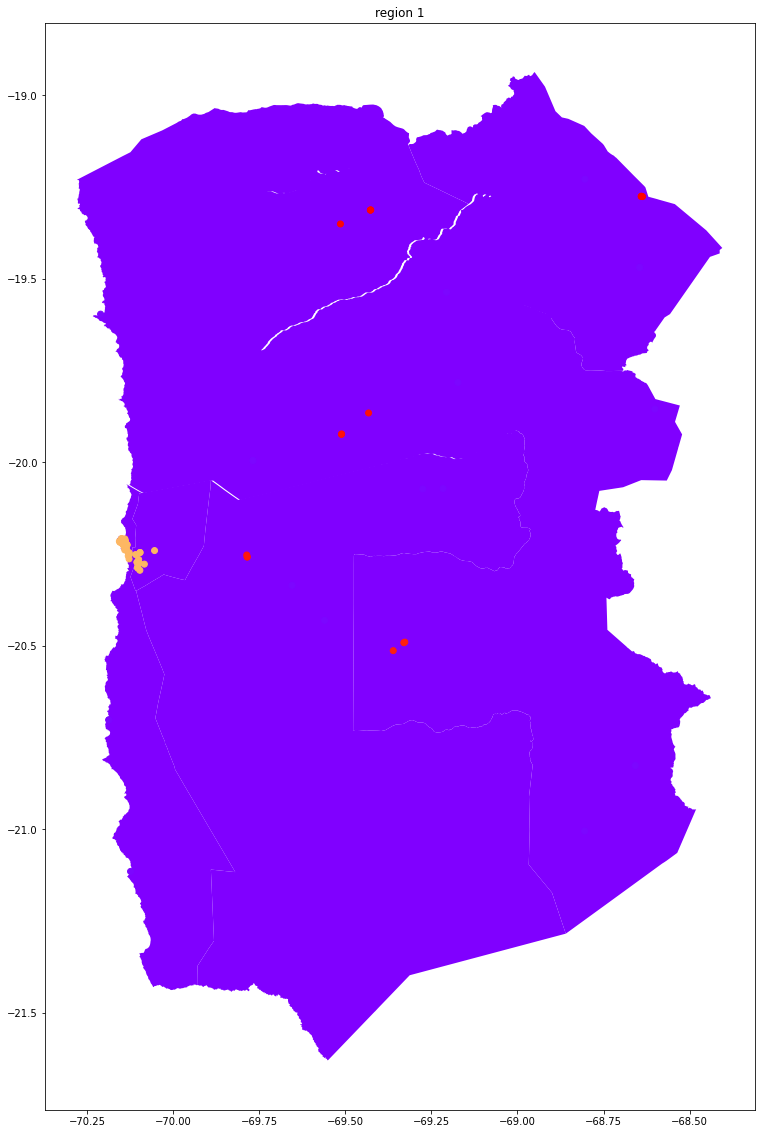

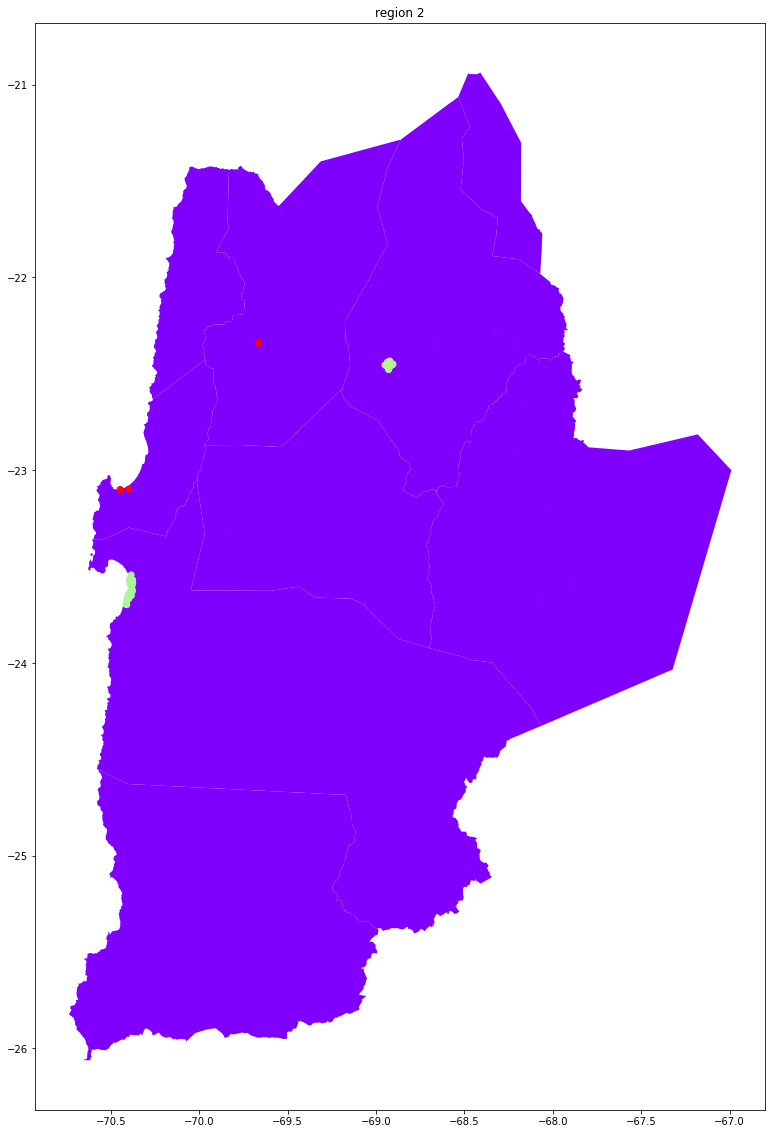

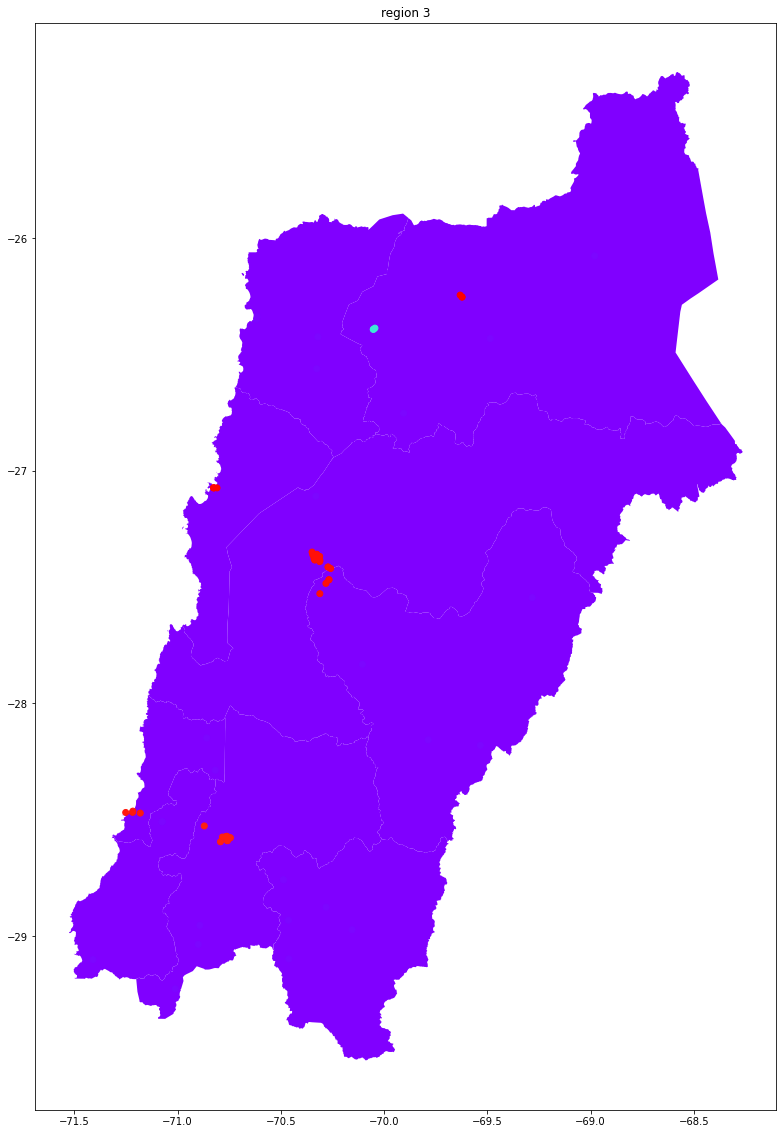

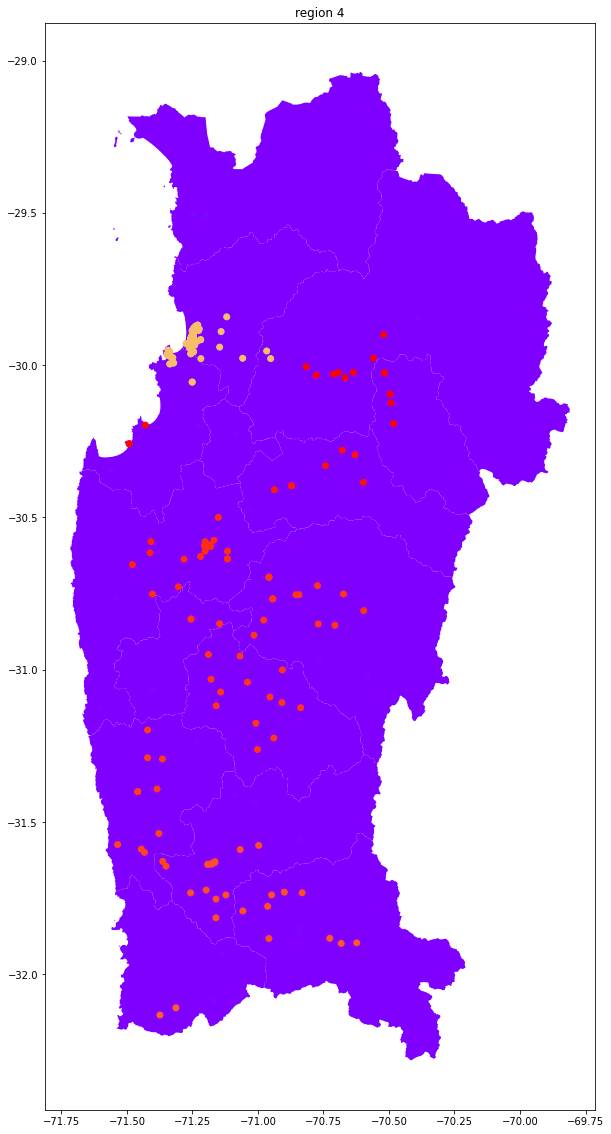

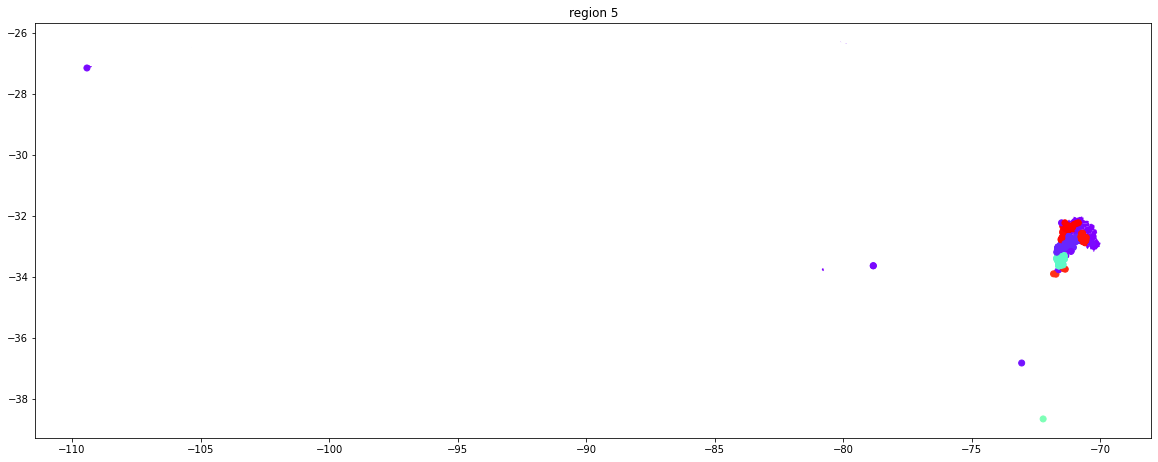

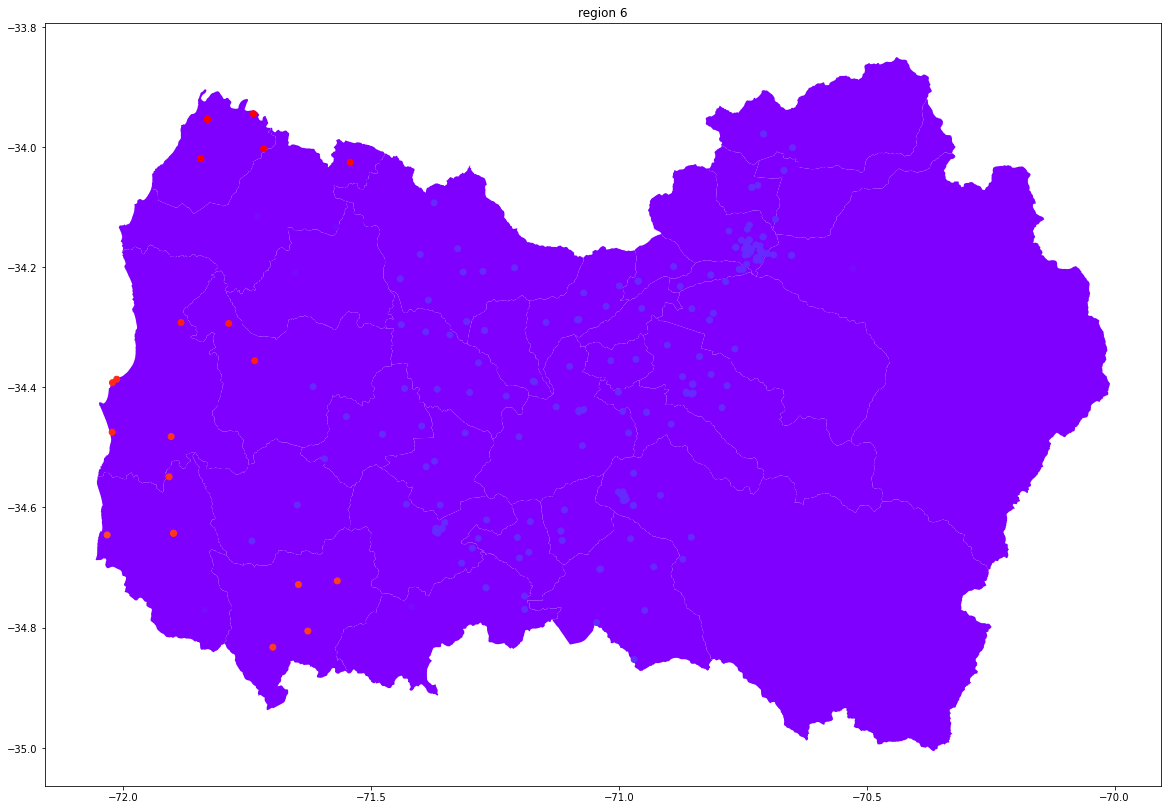

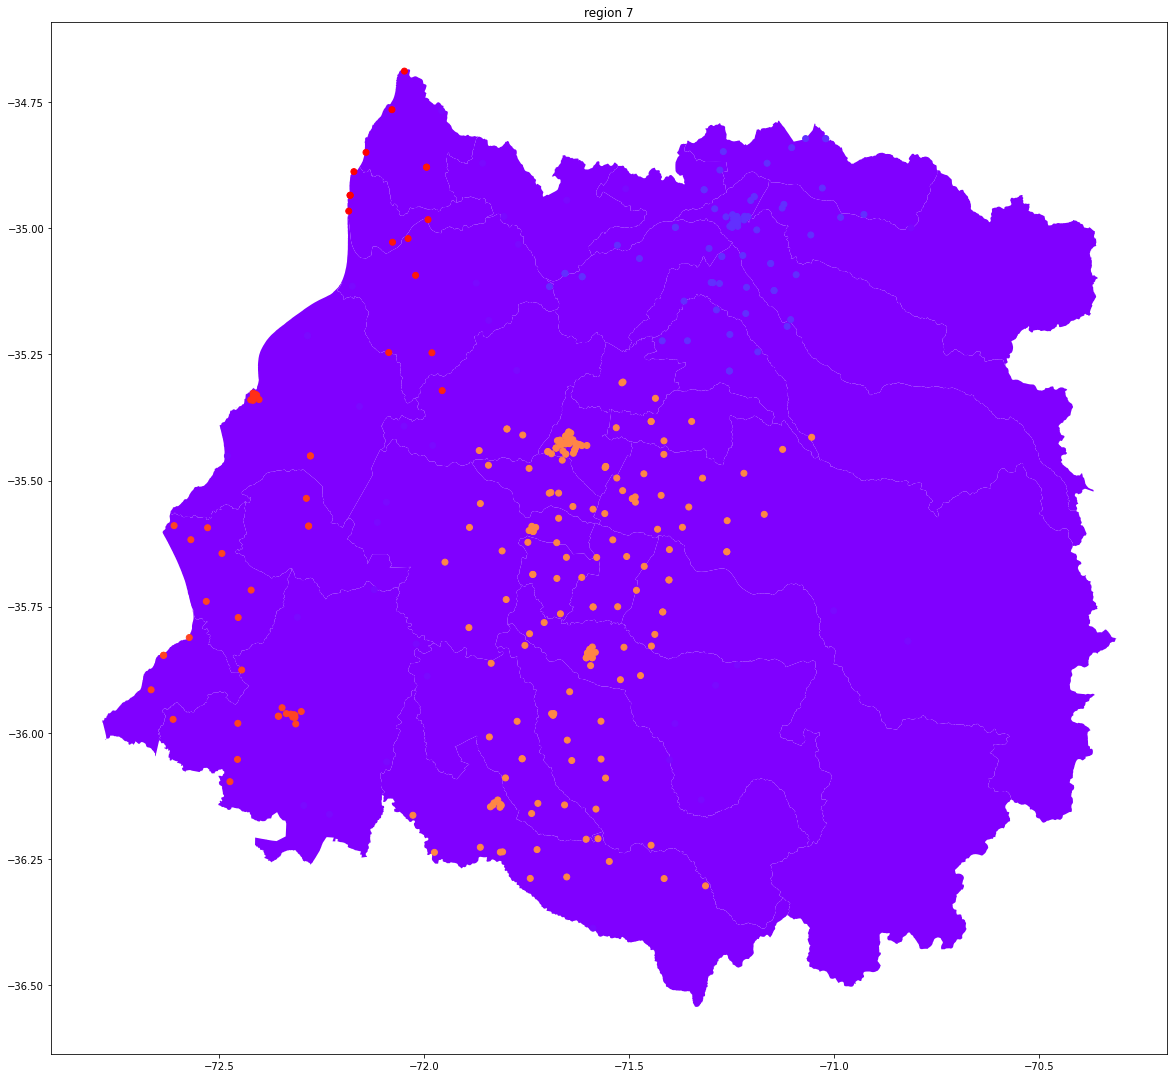

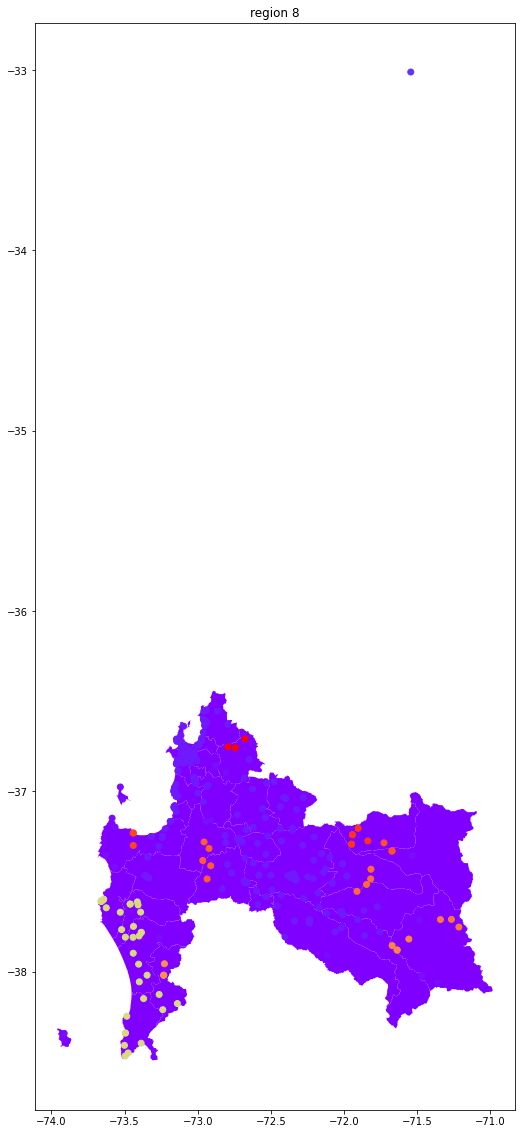

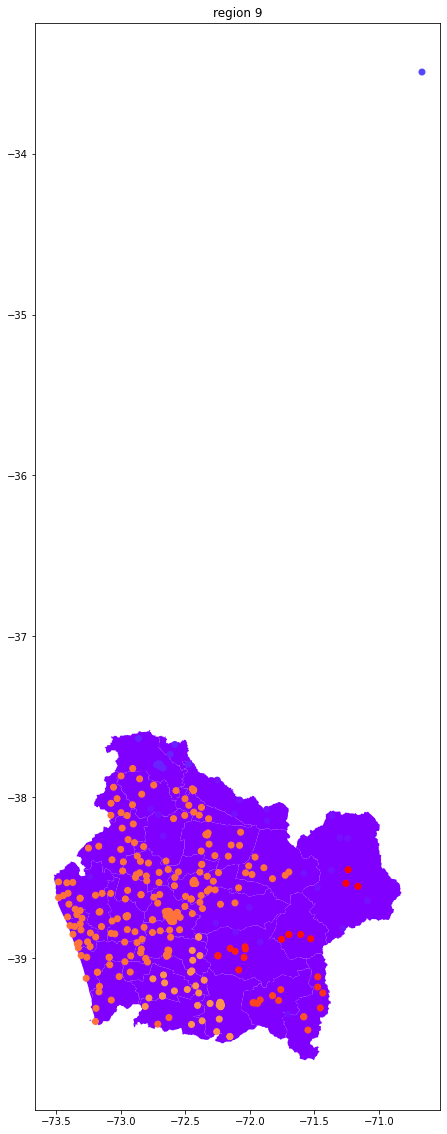

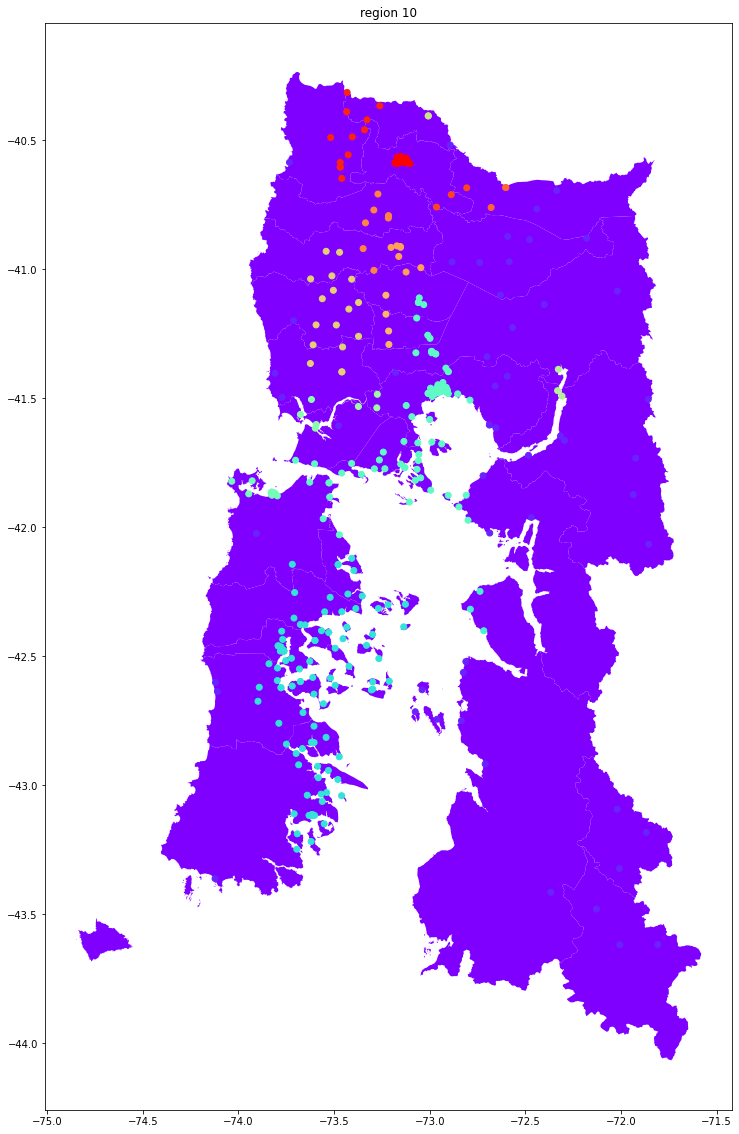

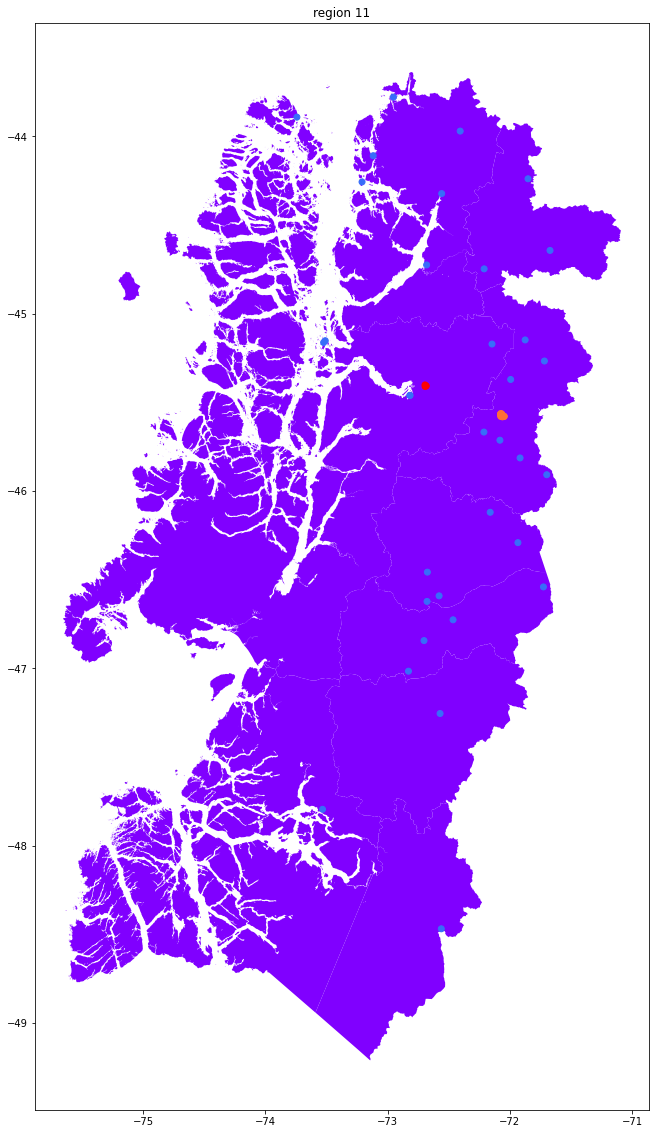

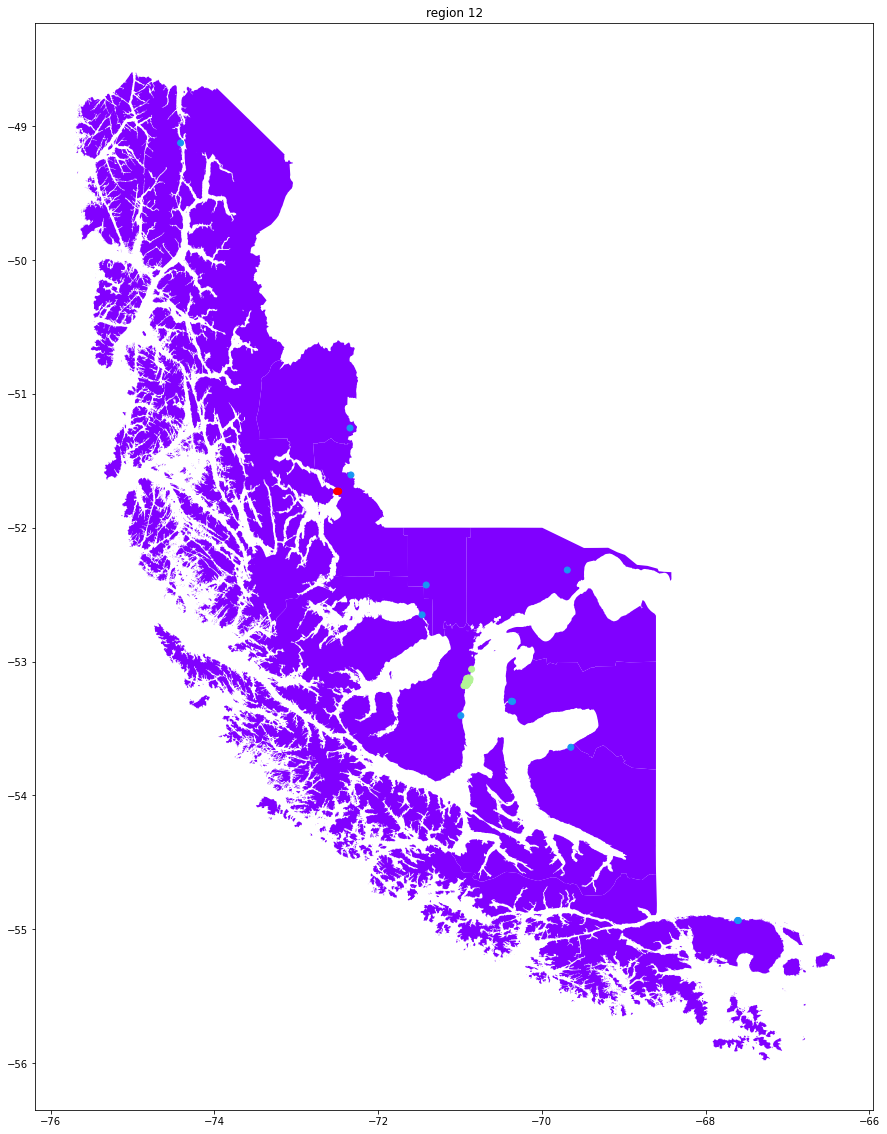

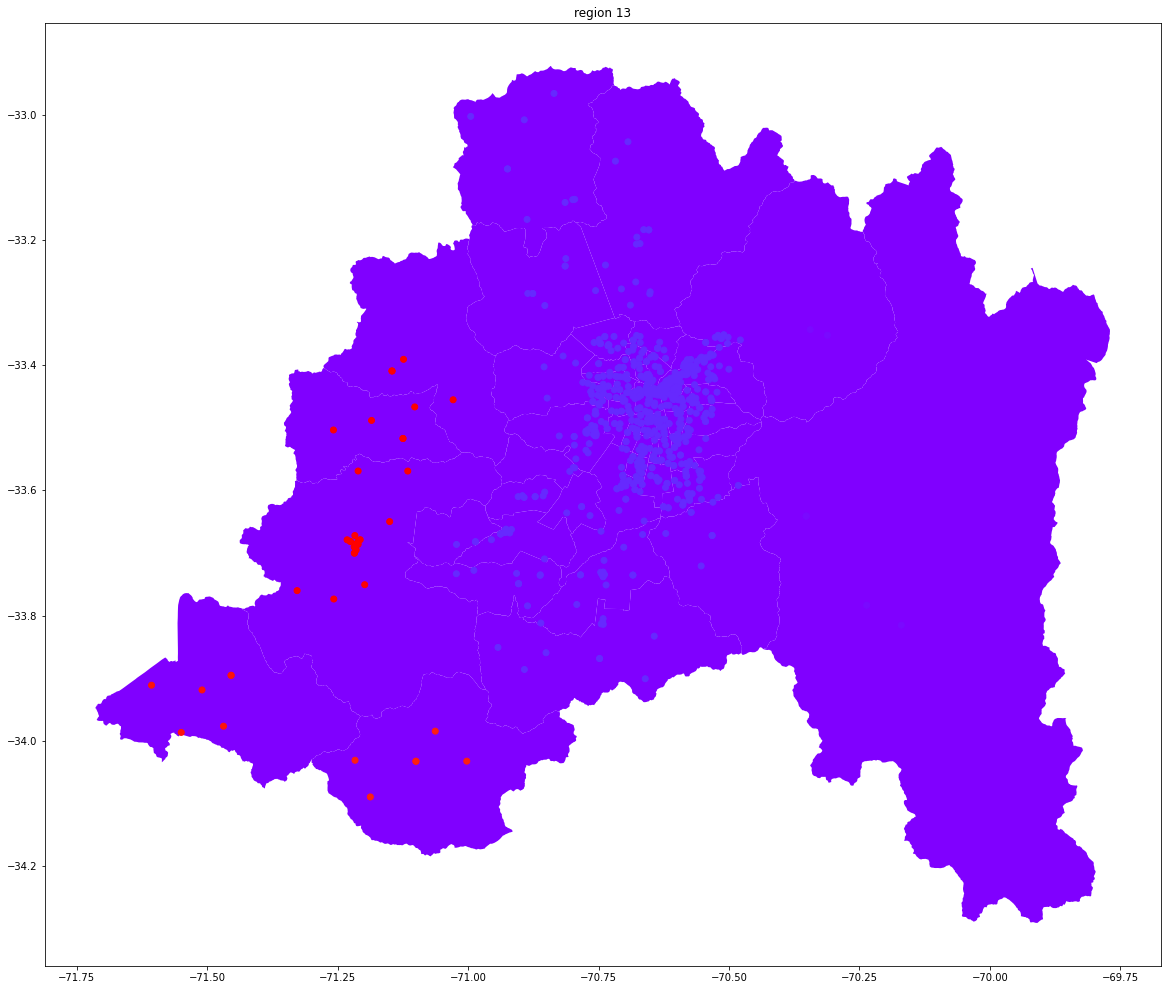

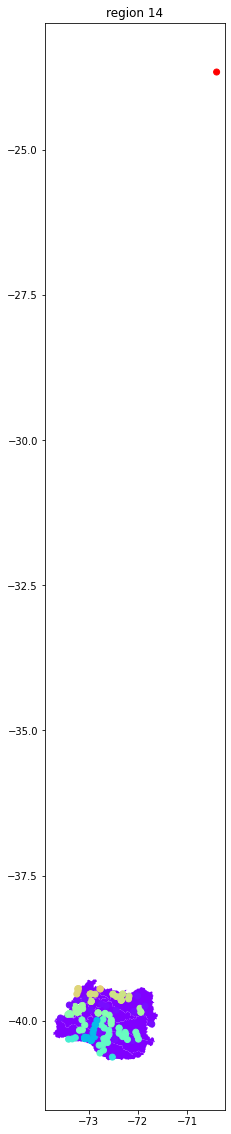

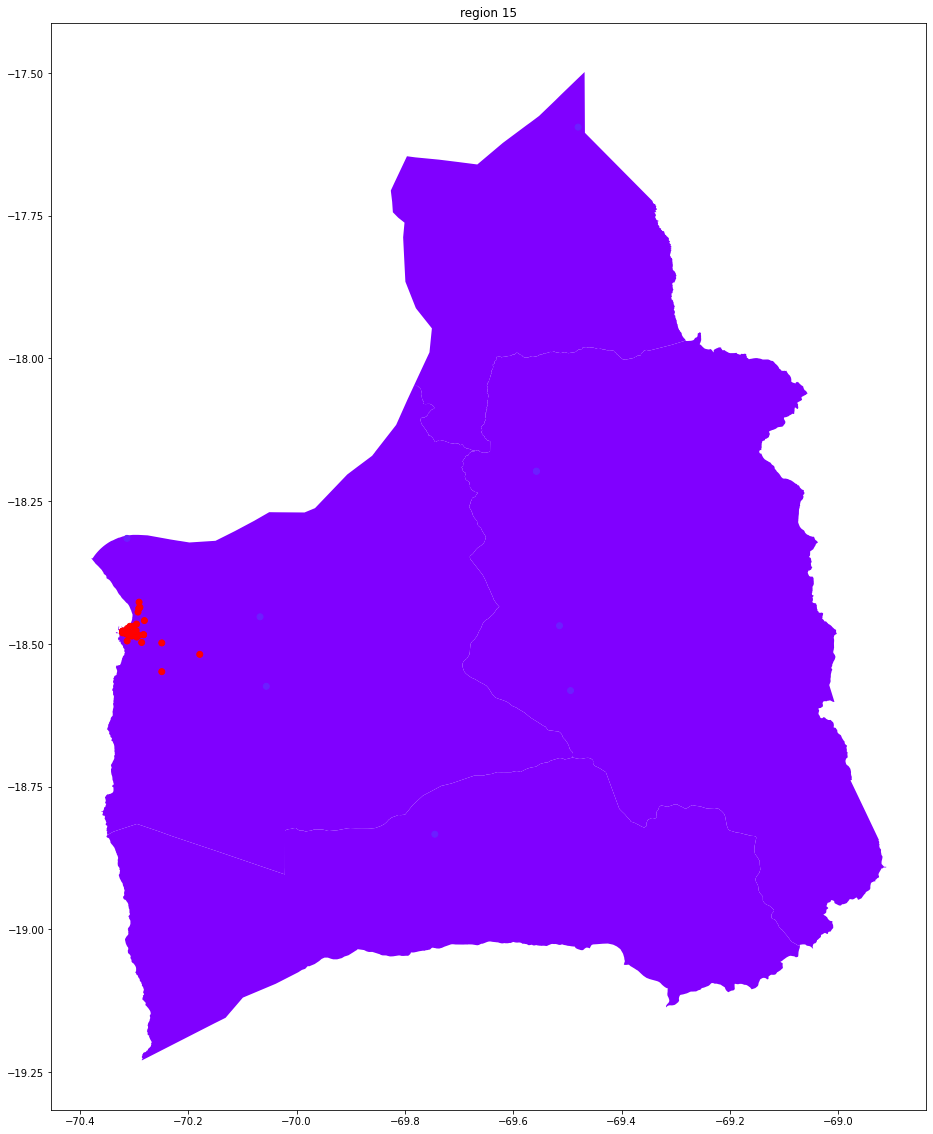

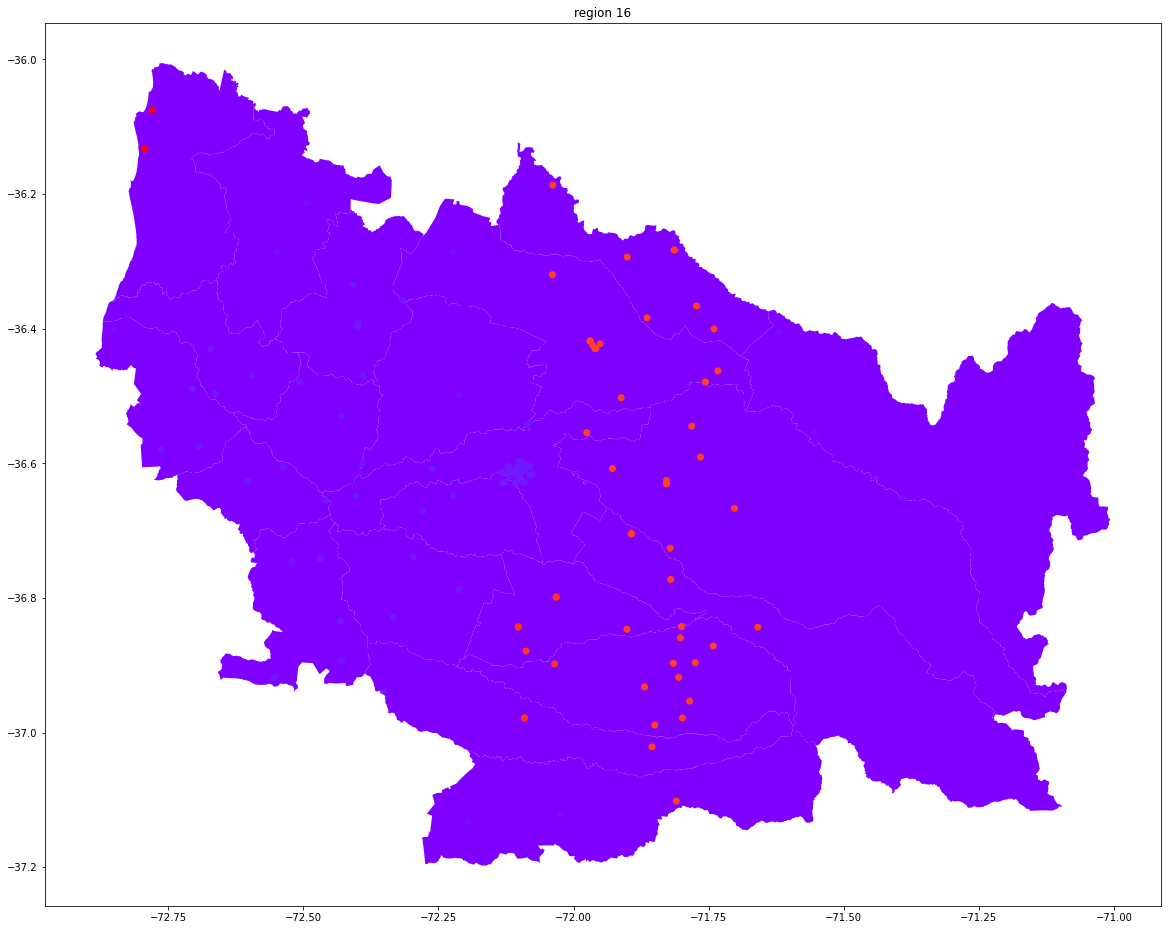

In [207]:
for i in range(1,17):
    gdf_selected_region = comunas[comunas['código_región'] == i]
    gdf_selected_region_hospitals = gdf_hospitales[gdf_hospitales['código_región'] == i]
    
    overlay = gdf_selected_region.overlay(gdf_selected_region_hospitals, how="union", keep_geom_type=False)
    
    overlay['Cluster'] = overlay['Cluster'].fillna(-2)
    fig, ax = plt.subplots((1), figsize=[20,20])
    ax.set_title(f'region {i}')
    overlay.plot(cmap="rainbow", column="Cluster", ax=ax)

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

In [203]:
gdf_hospitales.head(1)

,código_vigente,código_región,nombre_región,código_dependencia_jerárquica_(seremi_/_servicio_de_salud),nombre_dependencia_jerárquica_(seremi_/_servicio_de_salud),pertenencia_al_snss,ámbito_de_funcionamiento,nombre_oficial,nivel_de_atención,código_comuna,nombre_comuna,tiene_servicio_de_urgencia,tipo_de_urgencia,latitud,longitud,tipo_de_prestador_sistema_de_salud,nivel_de_complejidad,tipo_de_atención,geometry,Cluster
1,126704,12,Región De Magallanes y de la Antártica Chilena,26.0,Servicio de Salud Magallanes,True,Establecimiento de Salud,Hospital Comunitario Cristina Calderón de Puer...,Primario,12201,CABO DE HORNOS,True,Urgencia Hospitalaria (UEH),-54.935209,-67.600393,Público,Baja Complejidad,Atención Cerrada-Hospitalaria,POINT (-67.60039 -54.93521),-1


In [208]:
for i in gdf_hospitales['Cluster'].unique():
    cluster = gdf_hospitales[gdf_hospitales['Cluster'] == i]
    print(f"El cluster {i} tiene centros de salud de complejidades {cluster['nivel_de_complejidad'].unique()}")
    print()

El cluster -1 tiene centros de salud de complejidades ['Baja Complejidad', 'Mediana Complejidad']
Categories (3, object): ['Alta Complejidad', 'Baja Complejidad', 'Mediana Complejidad']

El cluster 0 tiene centros de salud de complejidades ['Mediana Complejidad', 'Baja Complejidad', 'Alta Complejidad']
Categories (3, object): ['Alta Complejidad', 'Baja Complejidad', 'Mediana Complejidad']

El cluster 1 tiene centros de salud de complejidades ['Baja Complejidad', 'Mediana Complejidad', 'Alta Complejidad']
Categories (3, object): ['Alta Complejidad', 'Baja Complejidad', 'Mediana Complejidad']

El cluster 2 tiene centros de salud de complejidades ['Mediana Complejidad', 'Baja Complejidad', 'Alta Complejidad']
Categories (3, object): ['Alta Complejidad', 'Baja Complejidad', 'Mediana Complejidad']

El cluster 3 tiene centros de salud de complejidades ['Mediana Complejidad', 'Baja Complejidad']
Categories (3, object): ['Alta Complejidad', 'Baja Complejidad', 'Mediana Complejidad']

El cluste

In [210]:
for i in gdf_hospitales['Cluster'].unique():
    cluster = gdf_hospitales[gdf_hospitales['Cluster'] == i]
    print(f"El cluster {i} abarca las comunas {cluster['nombre_comuna'].unique()}")
    print()

El cluster -1 abarca las comunas ['CABO DE HORNOS' 'TIMAUKEL' 'PUNTA ARENAS' 'PORVENIR' 'RÍO VERDE'
 'LAGUNA BLANCA' 'SAN GREGORIO' 'NATALES' 'TORRES DEL PAINE' "O'HIGGINS"
 'TORTEL' 'COCHRANE' 'CHILE CHICO' 'RÍO IBÁÑEZ' 'COYHAIQUE' 'AISÉN'
 'LAGO VERDE' 'CISNES' 'GUAITECAS' 'PALENA' 'CHAITÉN' 'QUELLÓN'
 'FUTALEUFÚ' 'CHONCHI' 'COCHAMÓ' 'ANCUD' 'HUALAIHUÉ' 'PUERTO MONTT'
 'MAULLÍN' 'LOS MUERMOS' 'PUERTO VARAS' 'FRESIA' 'PUERTO OCTAY' 'PUYEHUE'
 'SAN JUAN DE LA COSTA' 'SAN PABLO' 'LAGO RANCO' 'LA UNIÓN' 'PANGUIPULLI'
 'CORRAL' 'LOS LAGOS' 'VALDIVIA' 'MÁFIL' 'MARIQUINA' 'CURARREHUE' 'CUNCO'
 'LONQUIMAY' 'VILCÚN' 'CARAHUE' 'CURACAUTÍN' 'LEBU' 'TRAIGUÉN'
 'COLLIPULLI' 'LOS SAUCES' 'ALTO BIOBÍO' 'MULCHÉN' 'CAÑETE' 'ARAUCO'
 'ANTUCO' 'SANTA JUANA' 'HUALQUI' 'YUNGAY' 'CORONEL' 'FLORIDA'
 'CONCEPCIÓN' 'SAN FABIÁN' 'SAN NICOLÁS' 'COELEMU' 'PARRAL' 'TREGUACO'
 'SAN CARLOS' 'QUIRIHUE' 'COBQUECURA' 'CAUQUENES' 'LINARES' 'RETIRO'
 'SAN CLEMENTE' 'SAN JAVIER' 'CONSTITUCIÓN' 'PENCAHUE' 'CUREPTO' 'ROME